In [1]:
# Jump-Start Example: Python analysis of MSPA Software Survey

# Update 2017-09-21 by Tom Miller and Kelsey O'Neill
# Update 2018-06-30 by Tom Miller v005 transformation code added

# tested under Python 3.6.1 :: Anaconda custom (x86_64)
# on Windows 10.0 and Mac OS Sierra 10.12.2 

# shows how to read in data from a comma-delimited text file
# manipuate data, create new count variables, define categorical variables,
# work with dictionaries and lambda mapping functions for recoding data 

# visualizations in this program are routed to external pdf files
# so they may be included in printed or electronic reports

# prepare for Python version 3x features and functions
# these two lines of code are needed for Python 2.7 only
# commented out for Python 3.x versions
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls

In [2]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map

In [3]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    
    #screen top half to get a triangle
    
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    # plt.savefig('plot-corr-map.pdf', 
     #bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        #orientation='portrait', papertype=None, format=None, 
        #transparent=True, pad_inches=0.25)

In [4]:
np.set_printoptions(precision=3)

In [5]:
# read in comma-delimited text file, creating a pandas DataFrame object
# note that IPAddress is formatted as an actual IP address
# but is actually a random-hash of the original IP address
valid_survey_input = pd.read_csv('mspa-survey-data.csv')

In [6]:
# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

In [7]:
# examine the structure of the DataFrame object
print('Contents of initial survey data ---------------')

Contents of initial survey data ---------------


In [8]:
# could use len() or first index of shape() to get number of rows/observations
print('Number of Respondents =', len(valid_survey_input)) 

Number of Respondents = 207


In [9]:
# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
print(valid_survey_input.columns)

Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')


In [10]:
# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(valid_survey_input)) 

              Personal_JavaScalaSpark  Personal_JavaScriptHTMLCSS  \
RespondentID                                                        
5135740122                          0                           0   
5133300037                         10                          10   
5132253300                         20                           0   
5132096630                         10                          10   
5131990362                         20                           0   

              Personal_Python  Personal_R  Personal_SAS  \
RespondentID                                              
5135740122                  0          50            50   
5133300037                 50          30             0   
5132253300                 40          40             0   
5132096630                 25          35            20   
5131990362                  0          70            10   

              Professional_JavaScalaSpark  Professional_JavaScriptHTMLCSS  \
RespondentID             

In [11]:
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})
    

In [12]:
# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']

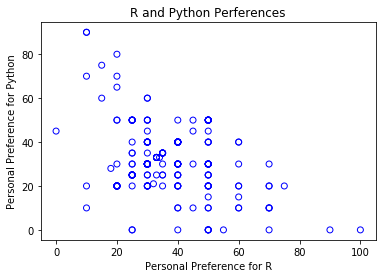

In [13]:
# single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 
plt.savefig('plot-scatter-r-python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25)  

In [14]:
survey_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS' ]    

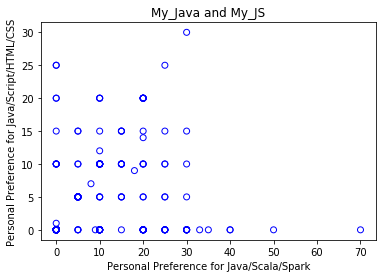

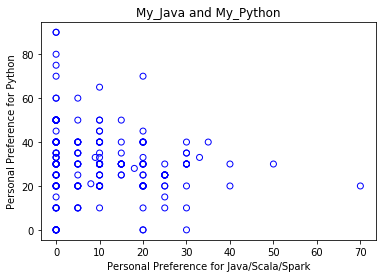

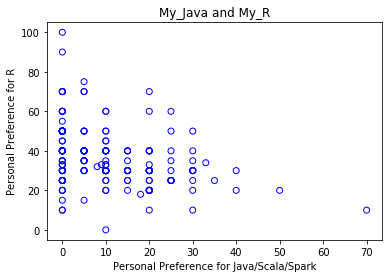

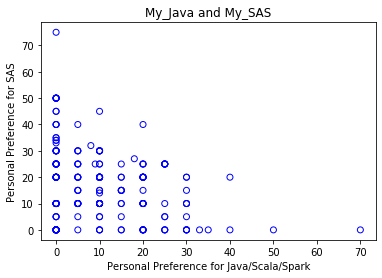

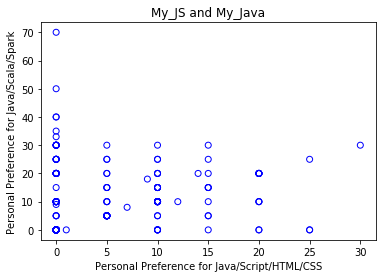

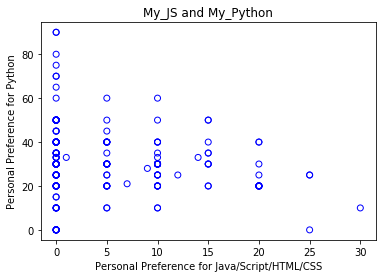

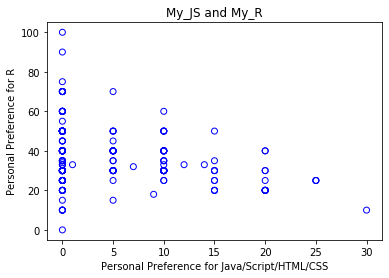

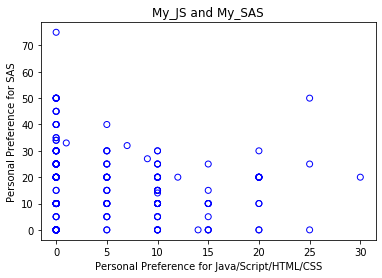

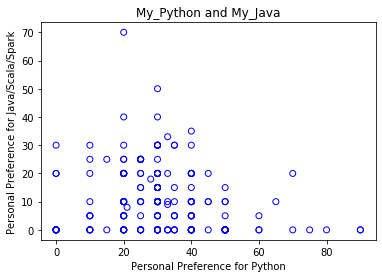

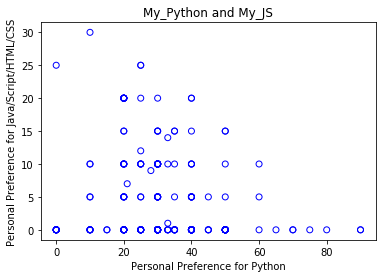

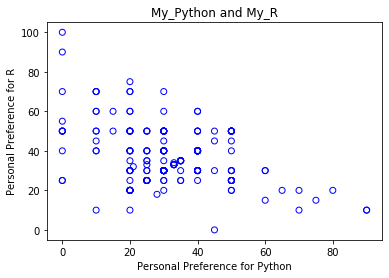

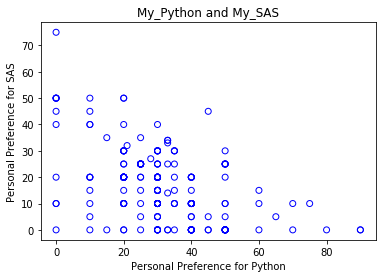

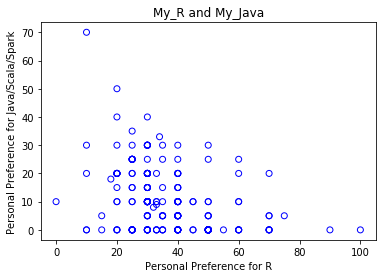

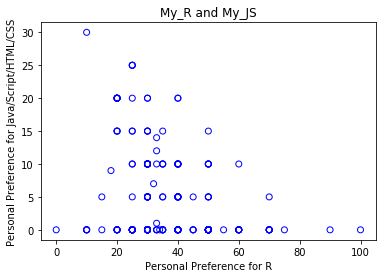

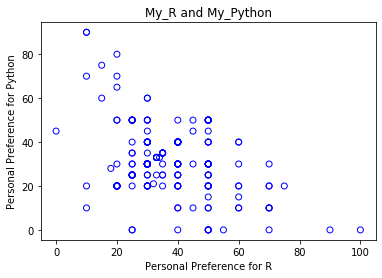

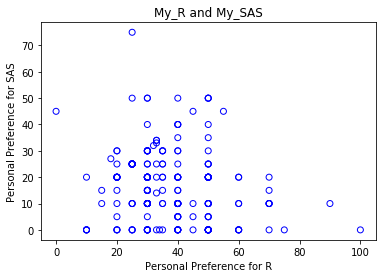

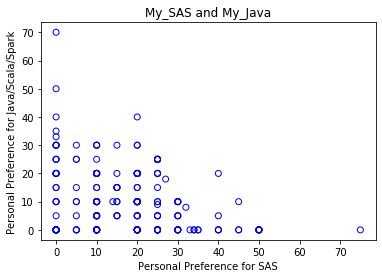

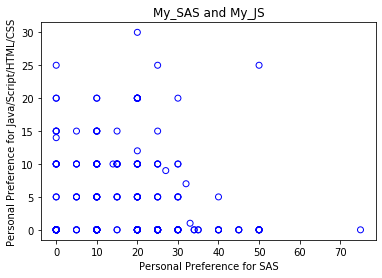

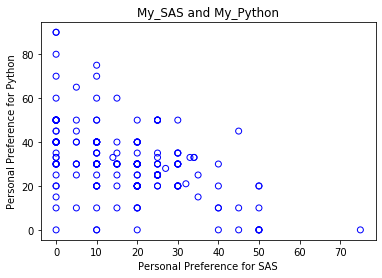

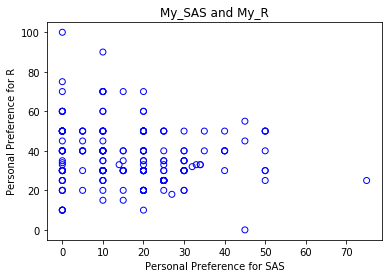

In [15]:
# create a set of scatter plots for personal preferences
for i in range(5):
    for j in range(5):
        if i != j:
            file_title = survey_df.columns[i] + '_and_' + survey_df.columns[j]
            plot_title = survey_df.columns[i] + ' and ' + survey_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(survey_df_labels[i])
            axis.set_ylabel(survey_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(survey_df[survey_df.columns[i]], 
            survey_df[survey_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue')
                        
            #plt.savefig(file_title + '.pdf',
             # bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b',
             #orientation='portrait', papertype=None, format=None,
              # transparent=True, pad_inches=0.25, facecolors = 'none')
                

<Figure size 432x288 with 0 Axes>

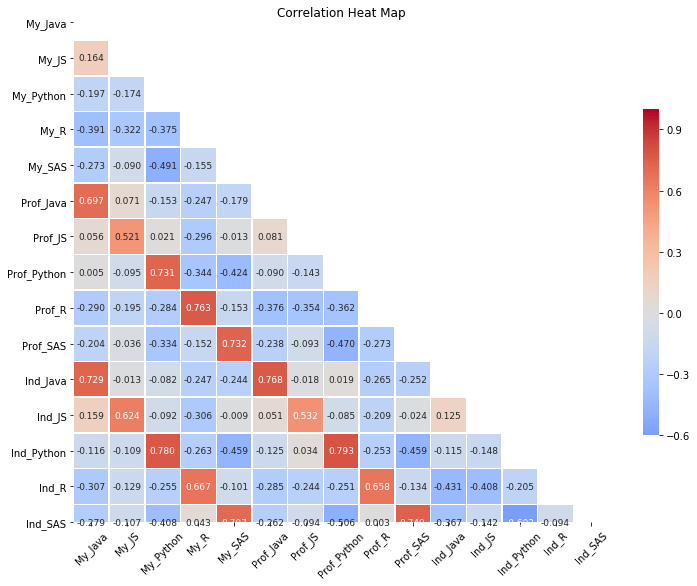

In [16]:
# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 

In [17]:
# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
print(software_df.describe())


Descriptive statistics for survey data ---------------
          My_Java       My_JS   My_Python        My_R      My_SAS   Prof_Java  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean    10.135266    4.797101   31.304348   37.125604   16.637681    9.251208   
std     11.383477    6.757764   15.570982   14.576003   13.626400   13.167505   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   20.000000   30.000000    5.000000    0.000000   
50%      9.000000    0.000000   30.000000   35.000000   15.000000    5.000000   
75%     20.000000   10.000000   40.000000   50.000000   25.000000   15.000000   
max     70.000000   30.000000   90.000000  100.000000   75.000000   80.000000   

          Prof_JS  Prof_Python      Prof_R    Prof_SAS    Ind_Java  \
count  207.000000   207.000000  207.000000  207.000000  207.000000   
mean     5.840580    30.028986   36.415459   18.463768   11.942029   
std 

In [18]:
# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())


Descriptive statistics for courses completed ---------------
count    187.000000
mean       6.342246
std        3.170849
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Courses_Completed, dtype: float64


In [19]:
# ----------------------------------------------------------
# transformation code added with version v005
# ----------------------------------------------------------
# transformations a la Scikit Learn
# documentation at http://scikit-learn.org/stable/auto_examples/
#                  preprocessing/plot_all_scaling.html#sphx-glr-auto-
#                  examples-preprocessing-plot-all-scaling-py
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [20]:
# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['Courses_Completed'].dropna()

In [21]:
# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

Text(0.5, 1.0, 'Unscaled')

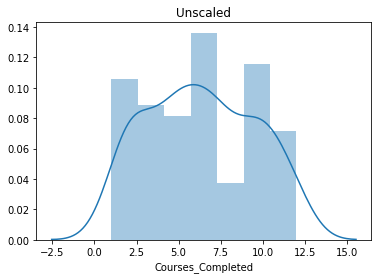

In [22]:
unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
#unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    #bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    #orientation='portrait', papertype=None, format=None, 
    #transparent=True, pad_inches=0.25,)  

Text(0.5, 1.0, 'StandardScaler')

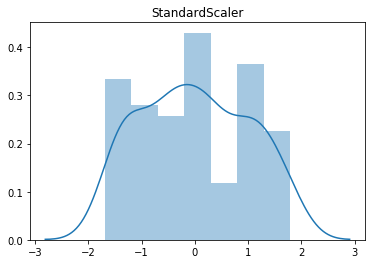

In [23]:
X = X.values.reshape(-1,1)
standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X)).set_title('StandardScaler')

#standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    #bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    #orientation='portrait', papertype=None, format=None, 
    #transparent=True, pad_inches=0.25, frameon=None) 

Text(0.5, 1.0, 'MinMaxScaler')

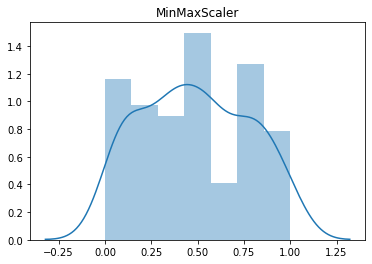

In [24]:
minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X)).set_title('MinMaxScaler')
#minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    #bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    #orientation='portrait', papertype=None, format=None, 
    #transparent=True, pad_inches=0.25, frameon=None)

Text(0.5, 1.0, 'NaturalLog')

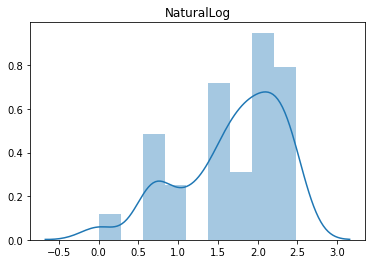

In [25]:
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')
#log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    #bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    #orientation='portrait', papertype=None, format=None, 
    #transparent=True, pad_inches=0.25, frameon=None)


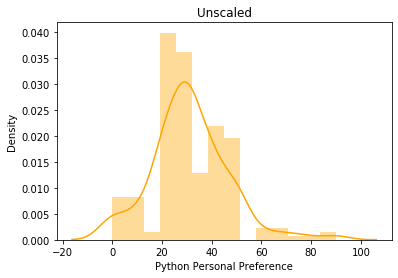

In [26]:
XX = survey_df['My_Python'].dropna()

sns.distplot((XX),color='orange').set_title('Unscaled')
plt.xlabel('Python Personal Preference')
plt.ylabel('Density')


plt.savefig('Unscaled.pdf', bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b',
orientation='portrait', papertype=None, format=None, transparent=True, pad_inches=0.25)


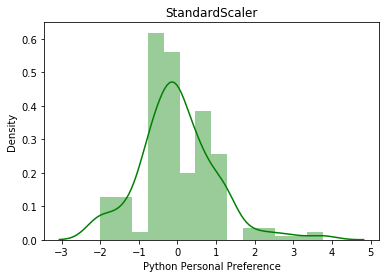

In [27]:
XX = XX.values.reshape(-1,1)
sns.distplot(StandardScaler().fit_transform(XX),color='green').set_title('StandardScaler')
plt.xlabel('Python Personal Preference')
plt.ylabel('Density')

plt.savefig('StandardScaler.pdf', bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b',
orientation='portrait', papertype=None, format=None, transparent=True, pad_inches=0.25)


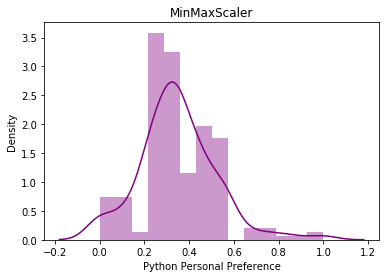

In [28]:
sns.distplot(MinMaxScaler().fit_transform(XX),color='purple').set_title('MinMaxScaler')
plt.xlabel('Python Personal Preference')
plt.ylabel('Density')

plt.savefig('Min MaxScaler.pdf', bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b',
orientation='portrait', papertype=None, format=None, transparent=True, pad_inches=0.25)


In [29]:
software_Interest_Industry = survey_df.loc[:, 'Ind_Java':'Ind_SAS']
software_Interest_Professional = survey_df.loc[:, 'Prof_Java':'Prof_SAS']
software_Interest_Personal = survey_df.loc[:, 'My_Java':'My_SAS']

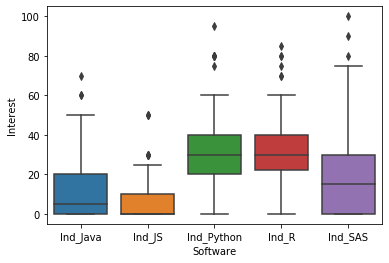

In [30]:
melted_software_Interest_Industry=software_Interest_Industry.melt()
sns.boxplot(x='variable', y='value', data=melted_software_Interest_Industry)
plt.xlabel('Software')
plt.ylabel('Interest')

plt.savefig('Industry Software Preference' + '.pdf', bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b',
orientation='portrait', papertype=None, format=None, transparent=True, pad_inches=0.25)

plt.show()

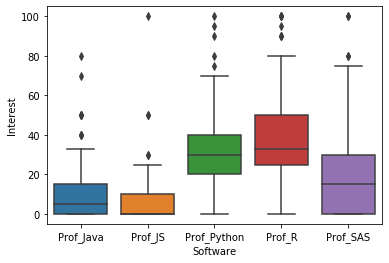

In [31]:
melted_software_Interest_Professional=software_Interest_Professional.melt()
sns.boxplot(x='variable', y='value', data=melted_software_Interest_Professional)
plt.xlabel('Software')
plt.ylabel('Interest')

plt.savefig('Professional Software Preference' + '.pdf', bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b',
orientation='portrait', papertype=None, format=None, transparent=True, pad_inches=0.25)

plt.show()

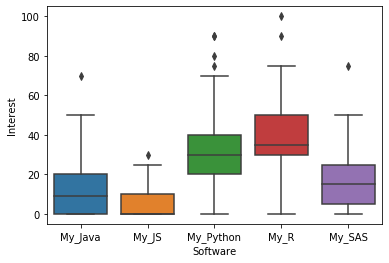

In [32]:
melted_software_Interest_Personal=software_Interest_Personal.melt()
sns.boxplot(x='variable', y='value', data=melted_software_Interest_Personal)
plt.xlabel('Software')
plt.ylabel('Interest')

plt.savefig('Personal Software Preference' + '.pdf', bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b',
orientation='portrait', papertype=None, format=None, transparent=True, pad_inches=0.25)

plt.show()

In [33]:
# Defining the courses of interest from the survey

survey_df = survey_df.rename(index=str, columns={
   'Python_Course_Interest': 'Python',
   'Foundations_DE_Course_Interest': 'Foundations',
   'Analytics_App_Course_Interest': 'Analytics',
   'Systems_Analysis_Course_Interest': 'Systems'
})

In [34]:
print(survey_df.head())

              My_Java  My_JS  My_Python  My_R  My_SAS  Prof_Java  Prof_JS  \
RespondentID                                                                
5135740122          0      0          0    50      50          0        0   
5133300037         10     10         50    30       0         25       25   
5132253300         20      0         40    40       0          0        0   
5132096630         10     10         25    35      20         10       10   
5131990362         20      0          0    70      10         20        0   

              Prof_Python  Prof_R  Prof_SAS  ...  PREDICT453  PREDICT454  \
RespondentID                                 ...                           
5135740122              0      25        75  ...         NaN         NaN   
5133300037             30      20         0  ...         NaN         NaN   
5132253300             40      40        20  ...         NaN         NaN   
5132096630             25      35        20  ...         NaN         NaN   
5131

In [35]:
course_interest = survey_df[['Python','Foundations','Analytics', 'Systems']]
course_interest = course_interest.fillna(0)

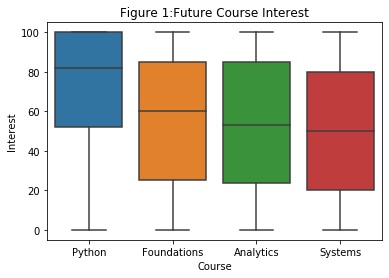

In [36]:
# understanding the future course interest of the students to plan the currriculam for the program 

melted_course_interest=course_interest.melt()
sns.boxplot(x='variable', y='value', data=melted_course_interest)
plt.xlabel('Course')
plt.ylabel('Interest')
plt.title('Figure 1:Future Course Interest')

plt.savefig('Course Interest.pdf',pad_inches=0.25)


plt.show()



In [37]:
survey_df = survey_df.rename(index=str, columns={
   'Python_Course_Interest': 'Python',
   'Foundations_DE_Course_Interest': 'Foundations',
   'Analytics_App_Course_Interest': 'Analytics',
   'Systems_Analysis_Course_Interest': 'Systems'
})

In [38]:
#Converting the graduation date into a numerical value to see if there is a correlation between graduation date and course interest

valid_survey_input['Grad Year']=0

In [39]:
valid_survey_input['Graduate_Date']=valid_survey_input['Graduate_Date'].fillna('2020 or Later')
print(valid_survey_input.head(20))

              Personal_JavaScalaSpark  Personal_JavaScriptHTMLCSS  \
RespondentID                                                        
5135740122                          0                           0   
5133300037                         10                          10   
5132253300                         20                           0   
5132096630                         10                          10   
5131990362                         20                           0   
5131860849                         25                          15   
5131698528                         20                           0   
5130809490                          0                           0   
5130188921                         30                          15   
5129721525                          0                           0   
5129569679                          5                          15   
5129476874                          5                           5   
5128886013                        

In [40]:
# Find all possible semesters for graduation

valid_survey_input['Graduate_Date']=valid_survey_input['Graduate_Date'].fillna('2020 or Later')
print(valid_survey_input['Graduate_Date'].unique())

['2020 or Later' 'Spring 2018' 'Fall 2018' 'Fall 2017' 'Summer 2019'
 'Summer 2018' 'Winter 2019' 'Winter 2018' 'Fall 2019' 'Fall 2016'
 'Summer 2017' 'Spring 2019' 'Spring 2017' 'Winter 2017']


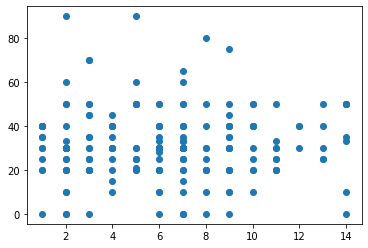

In [41]:
#To convert graduation date into a numerical value, asign number to the semesters staring from fall 2016 to 2020 and later.

valid_survey_input['Graduation']=0

valid_survey_input.loc[valid_survey_input['Graduate_Date']=='Fall 2016','Graduation']=1

valid_survey_input.loc[valid_survey_input['Graduate_Date']=='Winter 2017','Graduation']=2
valid_survey_input.loc[valid_survey_input['Graduate_Date']=='Spring 2017','Graduation']=3
valid_survey_input.loc[valid_survey_input['Graduate_Date']=='Summer 2017','Graduation']=4
valid_survey_input.loc[valid_survey_input['Graduate_Date']=='Fall 2017','Graduation']=5

valid_survey_input.loc[valid_survey_input['Graduate_Date']=='Winter 2018','Graduation']=6
valid_survey_input.loc[valid_survey_input['Graduate_Date']=='Spring 2018','Graduation']=7
valid_survey_input.loc[valid_survey_input['Graduate_Date']=='Summer 2018','Graduation']=8
valid_survey_input.loc[valid_survey_input['Graduate_Date']=='Fall 2018','Graduation']=9

valid_survey_input.loc[valid_survey_input['Graduate_Date']=='Winter 2019','Graduation']=10
valid_survey_input.loc[valid_survey_input['Graduate_Date']=='Spring 2019','Graduation']=11
valid_survey_input.loc[valid_survey_input['Graduate_Date']=='Summer 2019','Graduation']=12
valid_survey_input.loc[valid_survey_input['Graduate_Date']=='Fall 2019','Graduation']=13

valid_survey_input.loc[valid_survey_input['Graduate_Date']=='2020 or Later','Graduation']=14

#print(valid_survey_input.head(50))

plt.scatter(valid_survey_input['Graduation'],valid_survey_input['Personal_Python'])
plt.show()


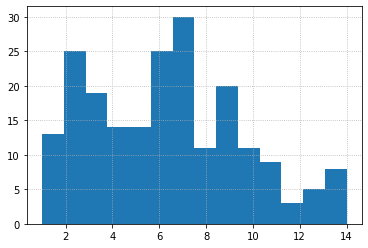

In [42]:
plt.hist(valid_survey_input['Graduation'],bins=14)
plt.grid(linestyle=':')
plt.show()

In [43]:
print(valid_survey_input.columns)

Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date', 'Grad Year', 'Graduation'],
      dtype='object')


In [44]:
print(valid_survey_input.columns)

Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date', 'Grad Year', 'Graduation'],
      dtype='object')


<Figure size 432x288 with 0 Axes>

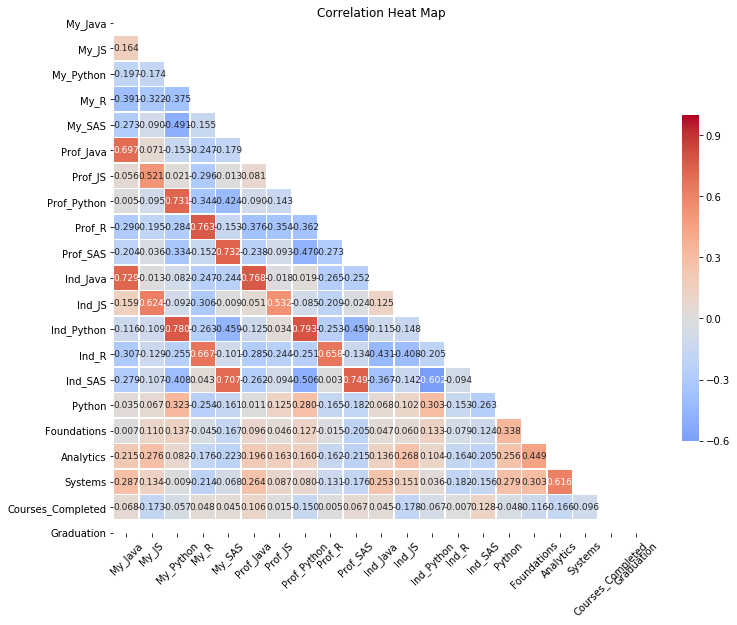

In [67]:
#correlation of all software and course interest to the graduation date 
valid_survey_input2 = pd.concat((survey_df, valid_survey_input[['Graduation']]),axis=1)
corr_chart(df_corr=valid_survey_input2)

